In [253]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.ndimage import binary_erosion

In [254]:
def show_images(images, columns=2, figsize=(10, 10)):
    
    if isinstance(images, np.ndarray):
        images = [images]
    rows = (len(images) + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=figsize)
    axes = np.array(axes).flatten()
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap='gray', interpolation='none')
        axes[i].axis('off')
    for i in range(len(images), len(axes)):
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [255]:
image_path = 'car.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
binary_image = original_image > 127 

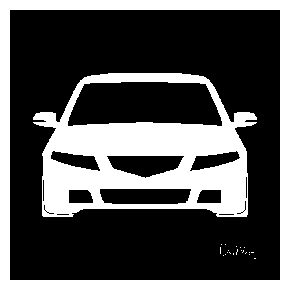

In [256]:
show_images(binary_image, columns=1, figsize=(3, 3))

In [257]:
def generate_structures():
    base = np.zeros(8, dtype=bool)
    base[:3] = True
    order = [0, 1, 2, 7, 8, 3, 6, 5, 4]
    struct_miss = np.array([
        np.concatenate((np.roll(base, shift), [False]))[order].reshape((3, 3))
        for shift in range(8)
    ])
    struct_hit = np.roll(struct_miss, 4, axis=0)
    struct_hit[:, 1, 1] = True
    struct_hit[1::2, ::2, ::2] = False
    return struct_hit, struct_miss

def morphological_operation(image, hit, miss):
    erosion_hit = binary_erosion(image, hit)
    erosion_miss = binary_erosion(~image, miss)
    return image & ~(erosion_hit & erosion_miss)

def thinning_iteration(image, struct_hit, struct_miss):
    for hit, miss in zip(struct_hit, struct_miss):
        image = morphological_operation(image, hit, miss)
    return image

def skeletonize(image):
    struct_hit, struct_miss = generate_structures()
    while True:
        new_image = thinning_iteration(image, struct_hit, struct_miss)
        if np.array_equal(new_image, image):
            break
        image = new_image
    return image

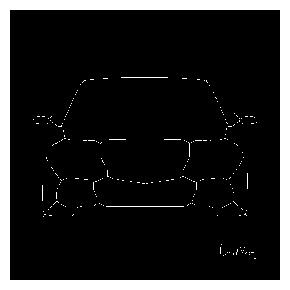

In [258]:
skeleton = skeletonize(binary_image)
show_images(skeleton,columns=1,figsize=(3,3))